## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [7]:
import pandas as pd
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [133]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

tbody_elements = soup.find_all("tbody")
if len(tbody_elements) > 1:
    for row in tbody_elements[1].find_all("tr"):
        col = row.find_all("td")
        if len(col) > 1:
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [59]:
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [135]:
rl = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
gamestop_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

tbody_elements = soup.find_all("tbody")
if len(tbody_elements) > 1:
    for row in tbody_elements[1].find_all("tr"):
        col = row.find_all("td")
        if len(col) > 1:
            date = col[0].text
            revenue = col[1].text.replace("$", "").replace(",", "")
            gamestop_revenue = gamestop_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gamestop_revenue.dropna(inplace=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]
gamestop_revenue['Revenue'] = pd.to_numeric(gamestop_revenue['Revenue'], errors='coerce')

print(gamestop_revenue.tail())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

C:\Users\sharm\AppData\Local\Temp\ipykernel_2492\171047793.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\sharm\AppData\Local\Temp\ipykernel_2492\171047793.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



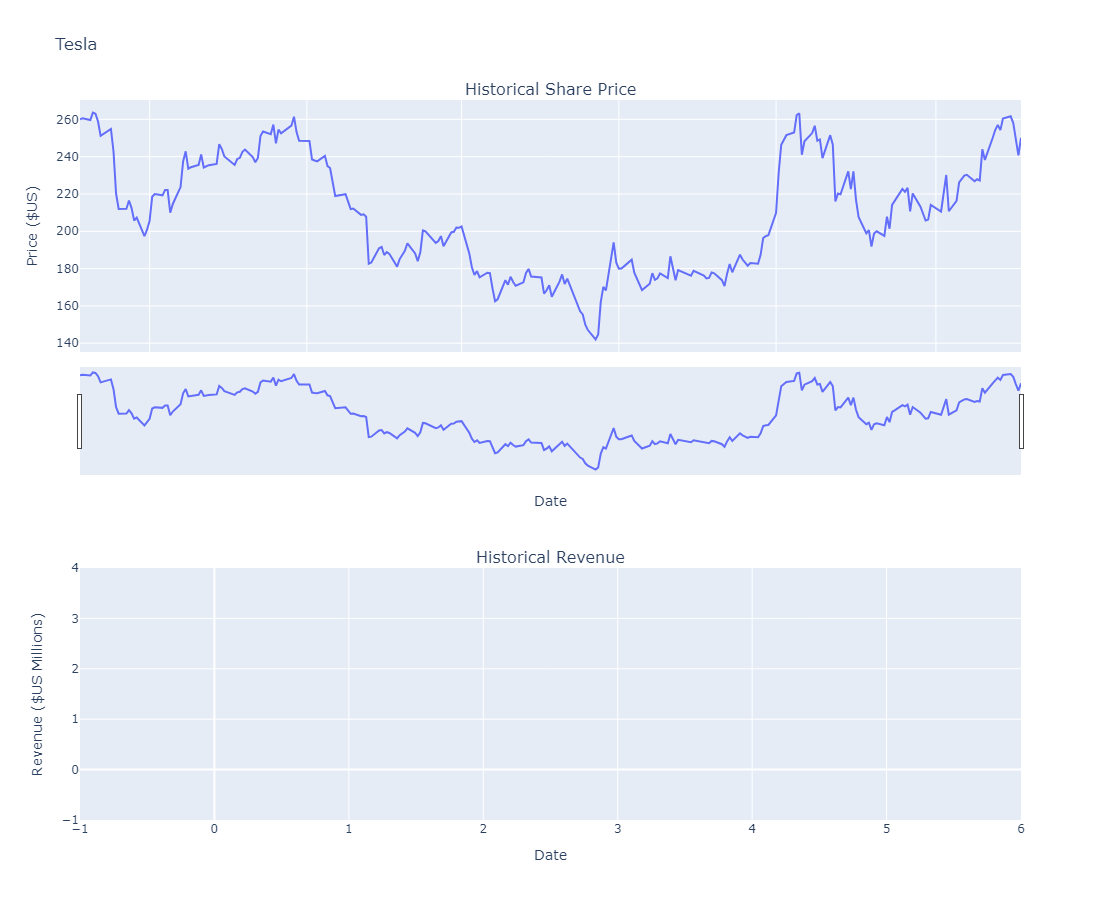

In [161]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

C:\Users\sharm\AppData\Local\Temp\ipykernel_2492\171047793.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\sharm\AppData\Local\Temp\ipykernel_2492\171047793.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



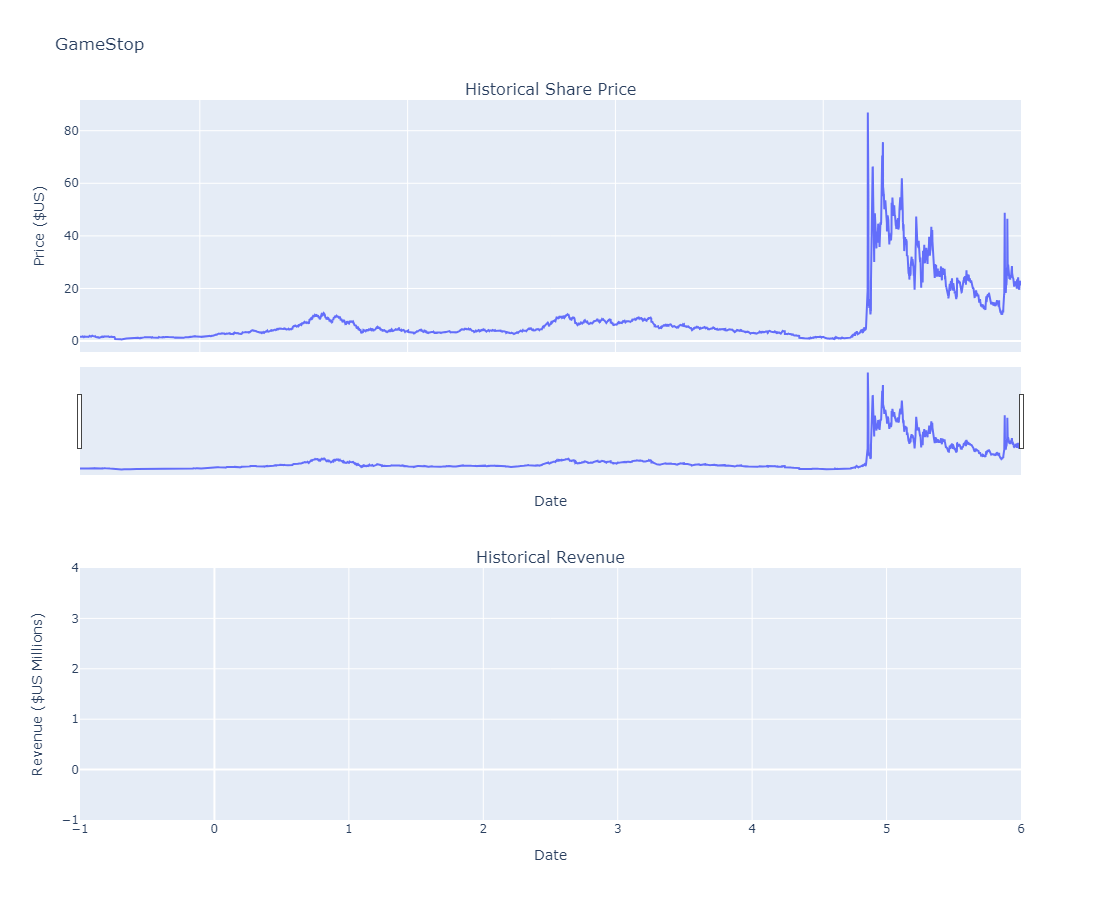

In [165]:
make_graph(gamestop_data, gamestop_revenue, 'GameStop')